# Analyze model results for the Baden & Schinznach springs

Temperature main springs (Sonney & Vautaz 2008, Geothermics 37): 
Baden: 47.0 degr. C
Schinznach: 30 degr. C

In [26]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

## Read model results:

In [27]:
fns = ['data/model_params_and_results_8_runs_baden_18-11-2018.csv',
      'data/model_params_and_results_8_runs_baden_mixing_18-11-2018.csv']

dfs = [pd.read_csv(fn) for fn in fns]

## make a figure of spring temperature over time:

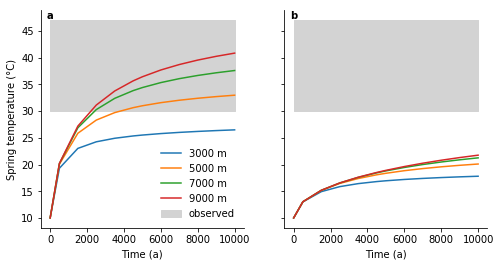

In [29]:
degree_symbol = chr(176)

fig, axs = pl.subplots(1, 2, figsize=(8, 4), sharey=True)

xs = np.array([0, 10000])
ys1 = np.array([30, 30])
ys2 = np.array([47, 47])

for i, df in enumerate(dfs):
    
    axs[i].fill_between(xs, ys1, ys2, color='lightgrey', label='observed')
    
    model_runs = np.unique(df['model_run'])
    
    for model_run in model_runs[1::2]:
        ind = df['model_run'] == model_run
        fb = float(df.loc[ind, 'fault_bottoms'].values[0].strip('[').strip(']'))
        label = '%0.0f m' % -fb
        axs[i].plot(df.loc[ind, 'runtime_yr'], df.loc[ind, 'max_surface_temperature'], label=label)

axs[0].set_ylabel('Spring temperature (%sC)' % degree_symbol)
for ax in axs:
    ax.set_xlabel('Time (a)')
        
axs[0].legend(loc='lower right', frameon=False)

for i, panel in enumerate(axs):
    panel.spines['top'].set_visible(False)
    panel.spines['right'].set_visible(False)
    panel.text(0.03, 1.0, string.ascii_lowercase[i], 
            weight='bold', transform=panel.transAxes, 
               ha='left', va='top', fontsize='medium')

fig.savefig('fig/modeled_T_Baden.pdf')

*Fig caption: Modeled temperatures over time in the Baden-Schinznach hot spring system for fluid conduits at various depth below the surface for a model without mixing of shallow water (panel a) and a model in which 50% of the spring water is derived from a shallow source (panel b). The observed present-day temperatures in the springs range from 30 to 47 degr. C (Sonney & Vautaz, 2008)*